In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('winequality-red.csv', index_col=0)

In [3]:
print(data.isnull().sum())

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
data

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1599 entries, 7.4 to 6.0
Data columns (total 11 columns):
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(10), int64(1)
memory usage: 149.9 KB


In [42]:
data.shape

(1599, 11)

In [6]:
data.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


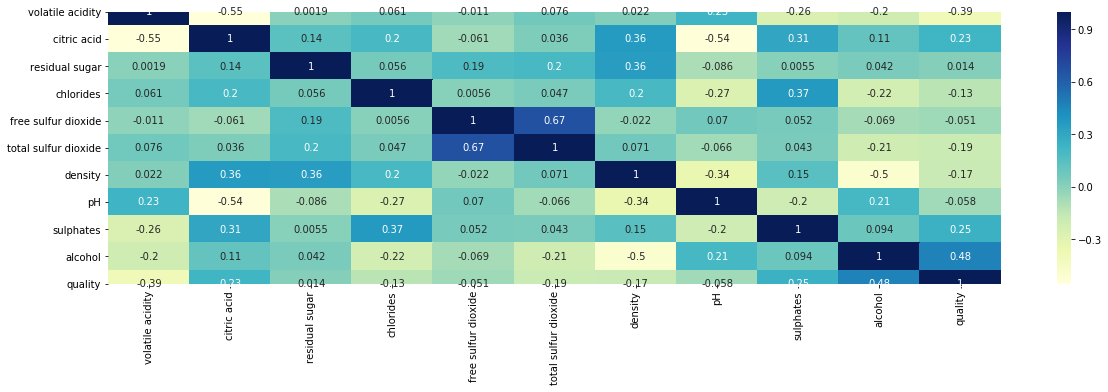

In [25]:
plt.figure(figsize=(20,5))
corr = data[data.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

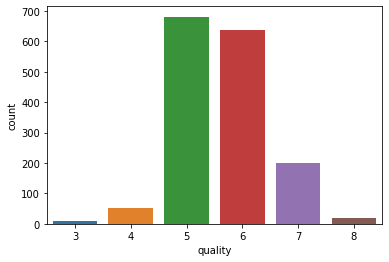

In [30]:
# Count of each type of wine
sns.countplot(x='quality', data=data)
# Most of the wines are of quality 5 and 6

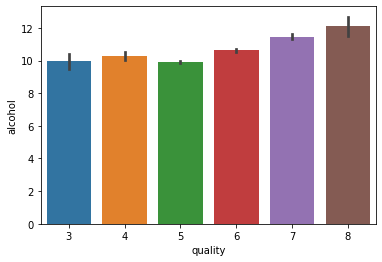

In [38]:
#Analyzing the relationship between average alcohol content and quality
sns.barplot(x='quality',y='alcohol',data=data)
# Average alcohol content increases in higher quality of wines

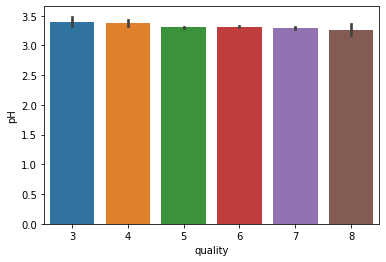

In [27]:
# Analyzing the relationship between wine quality and pH levels
sns.barplot(x='quality',y='pH', data=data)
# The pH level is almost similar in all the wines

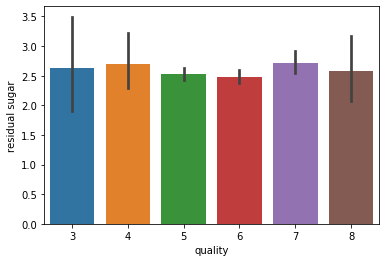

In [36]:
# Analyzing the relationship between average residual sugar and quality
sns.barplot(x='quality',y='residual sugar',data=data)
# Average residual sugar is almost similar in all types of wines

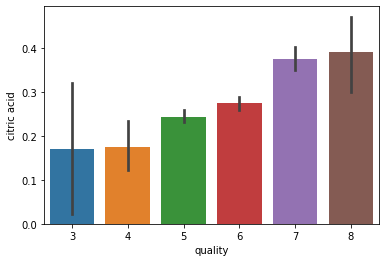

In [37]:
# Analyzing the relationship between citric acid and quality
sns.barplot(x='quality',y='citric acid',data=data)
# Citric acid content is very high in higher quality wines

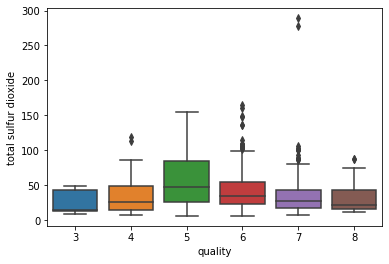

In [32]:
# The summary statistics indicates the presence of outliers in the total sulfur dioxide category
sns.boxplot(x='quality',y='total sulfur dioxide',data=data)
# The presence of outliers is evident in the boxplot

In [39]:
# Removing outliers
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [40]:
data_outliers=data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
data_outliers.shape

(1206, 11)

In [44]:
x=data.iloc[:,0:11]
y=data.iloc[:,-1]

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2score(cm,x,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [46]:
# Using KNeighborsRegressor

In [47]:
knr=KNeighborsRegressor()
k_range = list(range(1,50))
hyperparametersknr=dict(n_neighbors=k_range)
gridknr=GridSearchCV(knr, hyperparametersknr, cv=5, scoring='r2')
gridknr.fit(x,y)
print(gridknr.best_params_)

{'n_neighbors': 5}


In [48]:
knr=KNeighborsRegressor(n_neighbors = 5)
maxr2score(knr,x,y)

Maximum r2_score is at random state : 144  and it is : 0.6131484956716509


In [49]:
print("Mean r2 score for KNR after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNR from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNR after cross validation:  0.4106038141363265
Standard deviation for KNR from mean r2 score is :  0.08474173274520666


In [50]:
# Using Random Forest Regressor

In [51]:
rfr=RandomForestRegressor()
hyperparametersrfr={'criterion':['mse','mae'],'max_depth':range(1,10)}
gridrfr=GridSearchCV(rfr, hyperparametersrfr, cv=5, scoring='r2')
gridrfr.fit(x,y)
print(gridrfr.best_params_)

{'criterion': 'mse', 'max_depth': 3}


In [52]:
rfr=RandomForestRegressor(criterion = 'mse', max_depth = 3)
maxr2score(rfr,x,y)

Maximum r2_score is at random state : 0  and it is : 1.0


In [53]:
print("Mean f1 score for Random Forest Regressor after cross validation: ", cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Random Forest Regressor from mean r2 score is : ", cross_val_score(rfr,x,y,cv=5,scoring="r2").std())

Mean f1 score for Random Forest Regressor after cross validation:  0.9999478127147204
Standard deviation for Random Forest Regressor from mean r2 score is :  0.0


In [54]:
# The above analysis indicates that Random Forest Regressor has the highest r2 score

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20,stratify=y)
rfr.fit(x_train,y_train)
predicty=rfr.predict(x_test)
print("MSE is: ",mean_squared_error(y_test,predicty))
print("r2_score is: ",r2_score(y_test,predicty))

MSE is:  0.0
r2_score is:  1.0


In [56]:
from sklearn.externals import joblib
joblib.dump(rfr,'winequality_datset_rfr.pkl')

['winequality_datset_rfr.pkl']